[View in Colaboratory](https://colab.research.google.com/github/derekwise/math/blob/master/n_bonacci.ipynb)

# The n-Bonacci numbers in Python

## Zibonacci, Monobonacci, Fibonacci, Tribonacci, Tetrabonacci ... 

**Derek K. Wise**

1 Sept 2018

## Fibonacci Numbers

Everybody knows about the Fibonacci numbers.  They're defined recursively by 

$F(0) = F(1) = 1$

$F(k) = F(k-2) + F(k-1) \qquad (k\ge 2)$

From a combinatorics perspective, $F(k)$ is just number of ways to take a sequence of length $k$ and partition it into subsequences of length 1 or 2. 

A bit more colorfully: If in ascending a staircase you can take either one or two stairs each time, the number of distinct ways you can get to the top is the $k$th Fibonacci number, where $k$ is the total number of stairs.  The key observation for a resursive proof of this is that on your first step you can either go up only one stair, in which case you still have $k-1$ stairs to go, or you can go up two stairs, in which case you still have $k-2$ stairs to go.

## $n$-Bonacci numbers

This way of viewing the Fibonacci numbers also makes them easy to generalize: we can define the $n$-Bonacci number $f_n(k)$ to be the number of ways to take a sequence of length $k$ and partition it into sequnces of length $\ell$ for $1\le \ell\le n$. 

In the "stairs" analogy, for example, if you have longer legs, maybe you can take either one or two or _three_ stairs each time.  In that case, the number of distinct ways you can get to the top of a flight of $k$ stairs is [Tribonacci number](http://mathworld.wolfram.com/TribonacciNumber.html) $f_3(k)$.

On the other hand, if you have shorter legs, or the stairs are bigger, maybe you can only manage one stair at a time.  Then, the number of distinct ways you can reach the top is 1, regardless of how many steps there are.  So the **Monobonacci numbers** must be $1,1,1,1,\ldots$

One fun thing about the $n$-bonacci numbers $f_n(k)$  is that they're recursively defined in terms of both $n$ and $k$.  Notice that if $k<n$, then $f_n(k)$ is the same thing as $f_{n-1}(k)$, since you can't have any subsequences longer than $n-1$ anyway.  That gives us recursivity for $n$; the recursivity for $k$ works just like it does for the Fibonacci numbers.  So we get:
$$f_n(k) = \left\{
\begin{array}{cc}
f_{n-1}(k) & k<n\\
\displaystyle\sum_{i=1}^{n} f_n(k-i) & k\ge n
\end{array}
\right.
$$

For the base case, all we need are the **Monobonacci Numbers** $f_1(k) \equiv 1$.  However long your sequence is, there's exactly one way of partitioning it into subsequences of length 1. 

"Mono, Fi, Tri, Tetra..."  It's unfortunate that Fibonacci was not named "Dibonacci" instead.

## The $n$-bonacci numbers in Python

A good way to implement the Fibonacci numbers in Python is like this:

In [0]:
def fibonacci(k, cache={0:1, 1:1}):
  if k not in cache:
    cache[k] = fibonacci(k - 2) + fibonacci(k - 1)
  return cache[k]

**Note:** If you're not familiar with [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming), the `cache` bit might be confusing at first, but it's very important! Implementing the recursive definition directly in code can be _really slow_, since the number of function calls for calculating $F(k)$ grows as $2^k$, and this involves computing the same values many times.  If you started calculating the Fibonacci numbers by hand, you'd probably write down values as you figured them out, so you didn't have to recalculate any. This is what the `cache` is for.  Initially, it just holds the values $F(0)$ and $F(1)$, but then it keeps storing new values to be referenced later.

In [2]:
[fibonacci(k) for k in range(15)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

and this avoids stack overflow and makes it fast to calculate even large Fibonacci numbers:

In [3]:
fibonacci(100)

573147844013817084101

For the $n$-bonacci numbers, we use the doubly-recursive formula above.  In Python, I'll do this with a higher-order function (i.e., a function that returns another function), defining `bonacci` to be the function that maps
$$n \mapsto f_n$$
The function `bonacci` itself doesnt need a cache, but each `bonacci(n)` does, and this initially stores the base cases, which come  from `bonacci(n-1)`:

In [0]:
def bonacci(n):
  """
  Higher-order function that takes a nonnegative integer n
  and returns the function that takes a nonnegative integer k
  and gives the kth n-bonacci number.
  """
  if n == 1:  # the Monobonacci numbers
    return lambda k: 1
  inits = {m: bonacci(n - 1)(m) for m in range(n)}
  def f(k, cache=inits):
    if k not in cache:
      cache[k] = sum([f(k-i) for i in range(1,n+1)])
    return cache[k]
  return f

The reason for using a higher order function here is that we can easily define functions to generate, say, the Fibonacci and Tribonacci numbers:

In [0]:
fib = bonacci(2)
trib = bonacci(3)

In [6]:
print([fib(k) for k in range(10)])
print([trib(k) for k in range(10)])

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
[1, 1, 2, 4, 7, 13, 24, 44, 81, 149]


Let's print a table of the first few $n$-bonacci numbers for $n=1,\ldots 5$

In [7]:
print("n = {:5} {:5} {:5} {:5} {:5}".format(1,2,3,4,5))
print("-"*35)
for i in range(10):
  print("    {:5} {:5} {:5} {:5} {:5}".format(bonacci(1)(i),
                                     bonacci(2)(i),
                                     bonacci(3)(i),
                                     bonacci(4)(i),
                                     bonacci(5)(i)
                                    )) 

n =     1     2     3     4     5
-----------------------------------
        1     1     1     1     1
        1     1     1     1     1
        1     2     2     2     2
        1     3     4     4     4
        1     5     7     8     8
        1     8    13    15    16
        1    13    24    29    31
        1    21    44    56    61
        1    34    81   108   120
        1    55   149   208   236


## 0-Bonacci numbers? 

What about going down to $n=0$?  At first, it seems like $n$-Bonacci numbers shouldn't make since for $n=0$, since this would seem to involve subsequences of length $\ell$ for $1 \le \ell \le 0$, and there are _no_ such subsequences.  However, if your sequence has length zero already, you can partition it into _no_ subsequences.  From the "stairs" perspective, if there are no stairs to ascend, then the number of ways you can reach the top by taking $\ell$ stairs at a time for $1\le \ell \le 0$ is _one_---you're already there.   Otherwise, if there are one or more stairs, there's no way to get to the top. 

Evidently, the zero-bonacci numbers are given by:
$$f_0(k) = \left\{
\begin{array}{cc}
1 & k=0\\
0 & k\ge 1
\end{array}
\right.$$
These can replace the monobonacci numbers as the base case for the recursive definition of $f_n(k)$ above.

Unfortunately, the ancient Greeks didn't have a concept of Zero, so I'll just call these the **Zibonacci** numbers.

I'll adjust the definition of bonacci accordingly.  We could eliminate the Monobonacci numbers entirely from the Python code, but this would be wasteful in terms of both memory and time, since there would be an extra cache that just stored the numbers `[1,1,1,...]`.  I'll leave in both base cases:

In [0]:
def bonacci(n):
  """
  Higher-order function that takes a nonnegative integer n
  and returns the function that takes a nonnegative integer k
  and gives the kth n-bonacci number.
  """
  if n == 0:  # the Zibonacci numbers
    return lambda k: 1 if k == 0 else 0
  if n == 1:  # the Monobonacci numbers
    return lambda k: 1
  inits = {m: bonacci(n - 1)(m) for m in range(n)}
  def f(k, cache=inits):
    if k not in cache:
      cache[k] = sum([f(k-i) for i in range(1,n+1)])
    return cache[k]
  return f

In [9]:
zib = bonacci(0)
print([zib(k) for k in range(12)])

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Infinitybonacci?

The generalization to $n = \infty$ is obvious.  You can check that
$$ f_\infty(k) = f_k(k) = 
\left\{
\begin{array}{cc}
1 & k=0\\
2^{k-1} & k\ge 1
\end{array}
\right.$$

In [0]:
def infbonacci(k):
  return 1 if k == 0 else 2**(k - 1)

I'll plot $f_n$ below for $n=0,1,2,3,3,4,5$, as well as $f_\infty$ (the red dots):

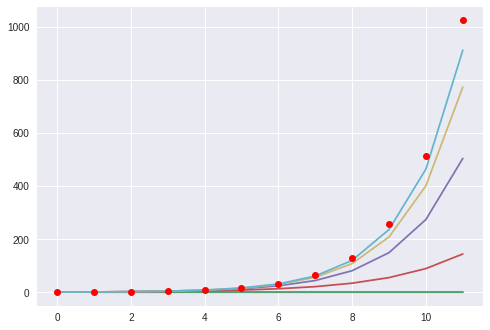

In [11]:
from matplotlib import pyplot as plt
for n in range(6):
  plt.plot([bonacci(n)(k) for k in range(12)])
plt.plot([infbonacci(k) for k in range(12)], 'ro')
plt.show()


## More fun:

To dig deeper into the combinatorics of the $n$-bonacci numbers, try these old [homework exercises](http://math.ucr.edu/home/baez/qg-winter2004/tribonacci.pdf) by John Baez, or read them along with [my solutions](http://math.ucr.edu/home/baez/qg-winter2004/tribonacci_derek.pdf). 

